# **Decode 10.3 Hackathon**

**Submitted by** - Sarvjeet Kour, DS Batch Jan' 21, Batch 3

## Problem Statement

Examine the dataset provided, perform EDA. Finally, for the given test dataset, predict whether an individual’s income will begreater than $50,000 per year based on several attributes from the census data.

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


### Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

### Loading and storing data in DataFrames

In [4]:
df_train = pd.read_csv(r"/content/gdrive/My Drive/hackathon/train.csv")
df_test = pd.read_csv(r"/content/gdrive/My Drive/hackathon/test.csv")

***

## An Insight into the data

The dataset provided has 32724 entries in the train dataset, and 9000 entries in the test dataset. 

In [5]:
df_train.head(2)

,ID,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,net-income
0,0,60,Self-emp-not-inc,235535,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,48,United-States,<=50K
1,1,28,Self-emp-not-inc,123983,Some-college,10,Married-civ-spouse,Sales,Own-child,Asian-Pac-Islander,Male,0,0,63,South,<=50K


In [6]:
df_test.head(2)

,ID,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,100002,67,Self-emp-inc,106175,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,2392,75,United-States
1,100006,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States


Each entry contains the following information about an individual:
* **age**: the age of an individual
    * Integer greater than 0
* **workclass** : a general term to represent the employment status of an individual
    * Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov,Without-pay, Never-worked.
* **fnlwgt**: final weight. In other words, this is the number of people the census believes the entry represents.
    * Integer greater than 0
* **education**: the highest level of education achieved by an individual.
    * Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc,9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* **education-num**: the highest level of education achieved in numerical form.
    * Integer greater than 0
* **marital-status**: marital status of an individual. Married-civ-spouse corresponds to a civilian spouse while Married-AF-spouse is a spouse in the Armed Forces.
    * Married-civ-spouse, Divorced, Never-married, Separated, Widowed,Married-spouse-absent, Married-AF-spouse.
* **occupation**: the general type of occupation of an individual
    * Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical,Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* **relationship**: represents what this individual is relative to others. For example an individual could be a Husband. Each entry only has one relationship attribute and is somewhat redundant with marital status. We might not make use of this attribute at all. 
    * Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* **race**: Descriptions of an individual’s race
    * White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* **sex**: the biological sex of the individual
    * Male, Female
* **capital-gain**: capital gains for an individual
    * Integer greater than or equal to 0
* **capital-loss**: capital loss for an individual
    * Integer greater than or equal to 0
* **hours-per-week**: the hours an individual has reported to work per week
    * continuous.
* **native-country**: country of origin for an individual
    * United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam,USVI,etc), India, Japan, Greece, South, China, Cuba, Iran,Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal,Ireland, France, Dominican Republic, Laos, Ecuador, Taiwan, Haiti, Columbia,Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* **net-income**: whether or not an individual makes more than $50,000 annually.
    * <=50k, >50k

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32724 entries, 0 to 32723
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              32724 non-null  int64 
 1   age             32724 non-null  int64 
 2   workclass       30829 non-null  object
 3   fnlwgt          32724 non-null  int64 
 4   education       32724 non-null  object
 5   education-num   32724 non-null  int64 
 6   marital-status  32724 non-null  object
 7   occupation      30823 non-null  object
 8   relationship    32724 non-null  object
 9   race            32724 non-null  object
 10  gender          32724 non-null  object
 11  capital-gain    32724 non-null  int64 
 12  capital-loss    32724 non-null  int64 
 13  hours-per-week  32724 non-null  int64 
 14  native-country  32156 non-null  object
 15  net-income      32724 non-null  object
dtypes: int64(7), object(9)
memory usage: 4.0+ MB


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              9000 non-null   int64 
 1   age             9000 non-null   int64 
 2   workclass       8526 non-null   object
 3   fnlwgt          9000 non-null   int64 
 4   education       9000 non-null   object
 5   education-num   9000 non-null   int64 
 6   marital-status  9000 non-null   object
 7   occupation      8524 non-null   object
 8   relationship    9000 non-null   object
 9   race            9000 non-null   object
 10  gender          9000 non-null   object
 11  capital-gain    9000 non-null   int64 
 12  capital-loss    9000 non-null   int64 
 13  hours-per-week  9000 non-null   int64 
 14  native-country  8841 non-null   object
dtypes: int64(7), object(8)
memory usage: 1.0+ MB


### Aggregations of all numerical columns

Insights:
* **age** : The mean age of the population is 38.57. There are more working class people between ages 20-60 in the dataset.
* **fnlwgt** : This column is not related to net-income at all, and will be removed at a later stage.
* **education-num** : Education-num has a mean of 10.07 which represents that a good number of people have received high education.
* **capital-gain** : Although, the mean of capital gain is $1078.22, but even the 75th percentile of capital gain is 0, which indicates that a major proportion of people have not made any capital gains at all. 
* **captial-loss** : Similar to captial gain, even the 75th percentile of capital loss is 0. 
* ** hours-per-week** : The mean, 25th percentile and median all are 40 hours/week, which indicates that a major proportion of population is doing a 40 hours/week job. 

In [9]:
df_train.describe()

,ID,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32724.000000,32724.000000,3.272400e+04,32724.000000,32724.000000,32724.000000,32724.000000
mean,16361.500000,38.574257,1.894990e+05,10.079941,1078.228792,87.700403,40.406216
std,9446.749441,13.712166,1.053437e+05,2.568684,7480.459910,401.872849,12.454379
min,0.000000,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,8180.750000,28.000000,1.175280e+05,9.000000,0.000000,0.000000,40.000000
50%,16361.500000,37.000000,1.779005e+05,10.000000,0.000000,0.000000,40.000000
75%,24542.250000,48.000000,2.370062e+05,12.000000,0.000000,0.000000,45.000000
max,32723.000000,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


### Combining train and test data for missing value, outlier treatment, and feature engineering

It is a good practice to combine train and test to apply the same changes made in data to both train and test dataframes. 

In [10]:
df_income = df_train["net-income"]

In [11]:
df_income.head()

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4     >50K
Name: net-income, dtype: object

In [12]:
df = pd.concat([df_train.drop(["net-income"], axis=1), df_test])

In [13]:
df.head(2)

,ID,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,0,60,Self-emp-not-inc,235535,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,48,United-States
1,1,28,Self-emp-not-inc,123983,Some-college,10,Married-civ-spouse,Sales,Own-child,Asian-Pac-Islander,Male,0,0,63,South


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41724 entries, 0 to 8999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              41724 non-null  int64 
 1   age             41724 non-null  int64 
 2   workclass       39355 non-null  object
 3   fnlwgt          41724 non-null  int64 
 4   education       41724 non-null  object
 5   education-num   41724 non-null  int64 
 6   marital-status  41724 non-null  object
 7   occupation      39347 non-null  object
 8   relationship    41724 non-null  object
 9   race            41724 non-null  object
 10  gender          41724 non-null  object
 11  capital-gain    41724 non-null  int64 
 12  capital-loss    41724 non-null  int64 
 13  hours-per-week  41724 non-null  int64 
 14  native-country  40997 non-null  object
dtypes: int64(7), object(8)
memory usage: 5.1+ MB


***

## Missing value treatment 

First of all, let's find all the columns that have missing values

In [15]:
df.isnull().sum()

ID                   0
age                  0
workclass         2369
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2377
relationship         0
race                 0
gender               0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     727
dtype: int64

Only the columns workclass, occupation, and native-country have null values. All of these columns are categorical columns

### Missing values in workclass

Let's look at the rows that have missing values in the workclass column

In [16]:
df[df['workclass'].isnull()]

,ID,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
3,3,75,NaN,35724,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,0,8,United-States
15,15,52,NaN,129893,HS-grad,9,Married-civ-spouse,NaN,Husband,Black,Male,0,1579,30,United-States
17,17,67,NaN,101761,Some-college,10,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States
29,29,36,NaN,187167,HS-grad,9,Separated,NaN,Not-in-family,White,Female,0,0,30,United-States
63,63,63,NaN,146196,Bachelors,13,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8894,107807,64,NaN,187656,1st-4th,2,Divorced,NaN,Not-in-family,White,Male,0,0,40,United-States
8897,107810,33,NaN,32207,HS-grad,9,Divorced,NaN,Not-in-family,White,Male,0,0,75,United-States
8898,107811,17,NaN,341395,10th,6,Never-married,NaN,Own-child,Black,Male,0,0,20,United-States
8955,107888,18,NaN,220168,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,16,United-States




One thing to notice here that whenever there is a null value in the workclass column, the corresponding occupation column also has a null value.

Now, let's look at all the rows with workclass as 'Never-worked'

In [17]:
df[df['workclass'] == 'Never-worked']

,ID,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
337,337,18,Never-worked,153663,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,4,United-States
2275,2275,17,Never-worked,237272,10th,6,Never-married,NaN,Own-child,White,Male,0,0,30,United-States
3406,3406,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,NaN,Wife,Black,Female,0,0,40,United-States
14516,14516,17,Never-worked,131593,11th,7,Never-married,NaN,Own-child,Black,Female,0,0,20,United-States
21456,21456,18,Never-worked,157131,11th,7,Never-married,NaN,Own-child,White,Female,0,0,10,United-States
32688,32688,20,Never-worked,273905,HS-grad,9,Married-spouse-absent,NaN,Other-relative,White,Male,0,0,35,United-States
4041,101382,18,Never-worked,162908,11th,7,Never-married,NaN,Own-child,White,Male,0,0,35,United-States
7837,106407,23,Never-worked,188535,7th-8th,4,Divorced,NaN,Not-in-family,White,Male,0,0,35,United-States


As we can see, the people who have never worked also have occupation as null, so we can say that null values in workclass belong to people who have not worked in their life. 

In [18]:
df["workclass"] = df["workclass"].fillna(value = "Never-worked") 

***

### Missing values in occupation

Let's look at the rows that have occupation as NaN

In [19]:
df[df['occupation'].isnull()]

,ID,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
3,3,75,Never-worked,35724,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,0,8,United-States
15,15,52,Never-worked,129893,HS-grad,9,Married-civ-spouse,NaN,Husband,Black,Male,0,1579,30,United-States
17,17,67,Never-worked,101761,Some-college,10,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States
29,29,36,Never-worked,187167,HS-grad,9,Separated,NaN,Not-in-family,White,Female,0,0,30,United-States
63,63,63,Never-worked,146196,Bachelors,13,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8894,107807,64,Never-worked,187656,1st-4th,2,Divorced,NaN,Not-in-family,White,Male,0,0,40,United-States
8897,107810,33,Never-worked,32207,HS-grad,9,Divorced,NaN,Not-in-family,White,Male,0,0,75,United-States
8898,107811,17,Never-worked,341395,10th,6,Never-married,NaN,Own-child,Black,Male,0,0,20,United-States
8955,107888,18,Never-worked,220168,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,16,United-States


These null values occur only when the workclass in 'Never-worked'. There is no category in occupation which corresponds to people who have not worked. Therefore, let's create a category 'Not-Applicable' in occupation for such people. 



In [20]:
df["occupation"] = df["occupation"].fillna(value = "Not-Applicable") 

***

### Missing values in native-country

In [21]:
df[df['native-country'].isnull()]

,ID,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
52,52,34,Private,340917,Prof-school,15,Married-civ-spouse,Exec-managerial,Husband,White,Male,2829,0,50,NaN
114,114,55,Private,157079,Some-college,10,Married-civ-spouse,Protective-serv,Husband,Black,Male,0,0,40,NaN
237,237,63,Private,221072,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,49,NaN
250,250,23,Private,216672,Bachelors,13,Never-married,Exec-managerial,Own-child,White,Male,0,0,30,NaN
467,467,40,Private,214891,Bachelors,13,Married-spouse-absent,Transport-moving,Own-child,Other,Male,0,0,45,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8597,107412,40,Local-gov,269168,HS-grad,9,Married-civ-spouse,Other-service,Husband,Other,Male,0,0,40,NaN
8668,107501,55,Private,200734,HS-grad,9,Separated,Other-service,Unmarried,Black,Female,0,0,40,NaN
8758,107622,26,Private,56929,Bachelors,13,Never-married,Exec-managerial,Not-in-family,Black,Male,0,0,50,NaN
8965,107901,59,Private,147989,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,NaN


Let's look at all number of unique rows for different countries in data

In [22]:
df['native-country'].value_counts()

United-States                 37478
Mexico                          793
Philippines                     257
Germany                         184
Canada                          158
Puerto-Rico                     148
India                           135
El-Salvador                     126
Cuba                            110
England                         107
China                           106
South                            97
Italy                            88
Jamaica                          88
Dominican-Republic               82
Japan                            76
Guatemala                        75
Poland                           75
Vietnam                          75
Columbia                         74
Haiti                            61
Taiwan                           59
Portugal                         56
Iran                             52
Ecuador                          43
Greece                           42
Peru                             39
Nicaragua                   

We can clearly see that most of the people have native country as United States. Therefore, it would be a good guess to fill the null values with United States, which happens to be the mode of native-country column.

In [23]:
df["native-country"] = df["native-country"].fillna(df["native-country"].mode()[0]) 

***

## Outlier Treatment

df_num represents the numerical columns of the dataset.

In [24]:
df_num = ["age", "fnlwgt", "education-num", "capital-gain","capital-loss","hours-per-week"]

Let's do the boxplot analysis of all of these columns to find the outliers. 

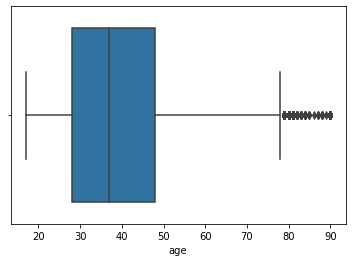

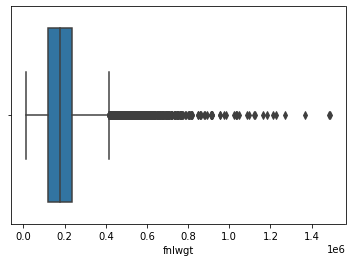

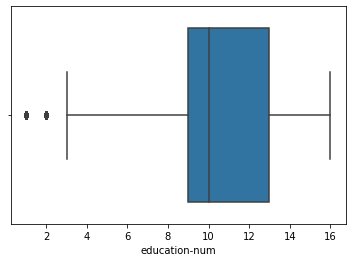

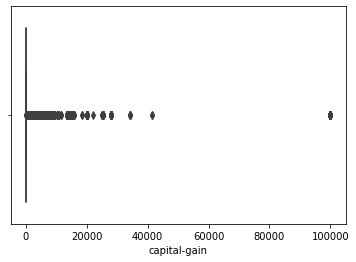

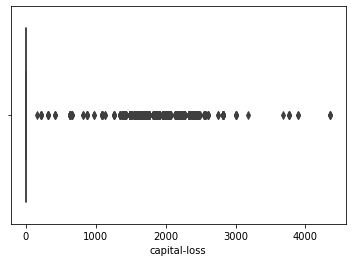

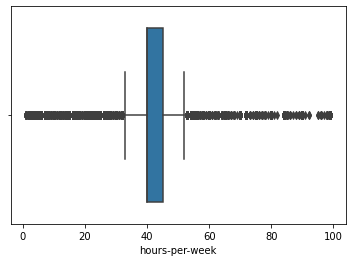

In [25]:
for i in df_num:
    sns.boxplot(df[i])
    plt.show()

As we can see, there are many data points that lie outside the interquartile range in all of these columns. Although, outliers may skew the training process of model, but removing these many datapoints from the dataset corresponds to a huge loss of information which could have been a useful indicator in the training process. 
For example, for capital gain, a person with $100k capital gain is an outlier, but we can easily say that he holds a very high likelihood of being in the >50k net-income category. 
Therefore, I decided not to remove these datapoints

***

## Feature Engineering

First of all, let's drop the fnlwgt feature as it is not related to net income. 

In [26]:
df = df.drop(["fnlwgt"], axis = 1)

Now, let's create a feature called as 'hours-per-week-bin'. This is a significant feature as the number of hours worked in a week by a person should directly be proportional to the person's income. 

In [27]:
bins = [0,20,40, 60,80,100]
labels = ["0-20", "20-40","40-60","60-80", "80-100"]
df["hours-per-week-bin"] = pd.cut(df["hours-per-week"], bins, labels = labels)

It is a good practice to divide people according to their age groups as people tend to have similar situations in life based of the age group they belong to. So, let's create another feature called as age-group 

In [28]:
bins = [10,20,30,40,50,60,70,80,90]
labels = ["10-20", "21-30","31-40","41-50", "51-60","61-70","71-80","81-90"]
df["age-group"] = pd.cut(df["age"], bins, labels = labels)

In [29]:
df.head()

,ID,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,hours-per-week-bin,age-group
0,0,60,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,48,United-States,40-60,51-60
1,1,28,Self-emp-not-inc,Some-college,10,Married-civ-spouse,Sales,Own-child,Asian-Pac-Islander,Male,0,0,63,South,60-80,21-30
2,2,71,Self-emp-not-inc,1st-4th,2,Divorced,Craft-repair,Not-in-family,White,Female,0,0,28,United-States,20-40,71-80
3,3,75,Never-worked,HS-grad,9,Widowed,Not-Applicable,Not-in-family,White,Female,0,0,8,United-States,0-20,71-80
4,4,50,Private,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1887,50,United-States,40-60,41-50


### Seperating train and test dataframes from the combined dataframe. 

Now that we're done with tweaks to the dataset, let's seperate the train and test dataframes for EDA and model training.

In [30]:
df_train = df.iloc[:len(df_train),:]
df_test = df.iloc[len(df_train):,:]

In [31]:
df_train["net-income"] = df_income

***

## EDA 

#### Histogram plots

Firstly, we perform univariate analysis of all the numerical features by plotting their histogram plots. 

num_col stores all the numerical columns of the dataset

In [33]:
num_col = df_train.select_dtypes(include = ["int64"]).columns.tolist()
num_col.remove("ID")
num_col

['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

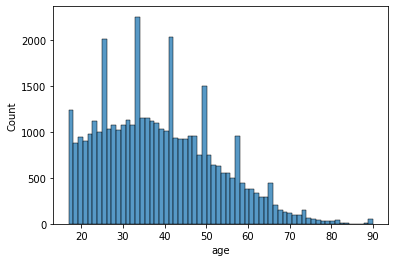

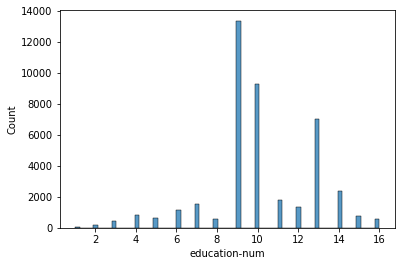

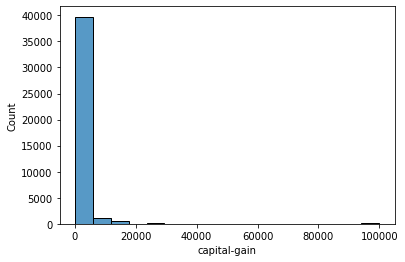

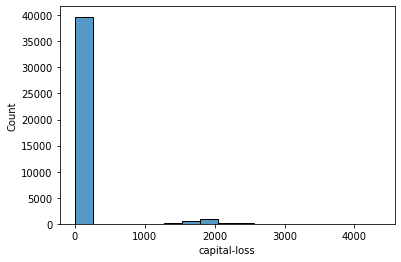

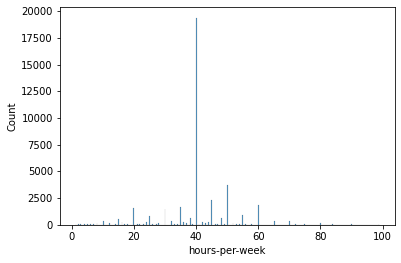

In [34]:
for i in num_col:
    sns.histplot(df[i])
    plt.show()

Insights:

* **age** : The distribution of age in the dataset is skewed towards the lower end. This corresponds to the fact that there are more working class people in the dataset. The distribution looks fairly similar to a normal distribution
* **education-num** : The major proportion of population has education-num 9 and above, which indicates that the majority of population at least finish their high school education.
* **capital-gain** : The majority in population had 0 capital gain, while only a few who had significant amount of capital gain.
* **capital-loss** : Similar to capital gain, the majority of population had 0 capital loss.
* **hours-per-week** : The majority of population are doing a 40 hours/week job. 
***

#### Pie charts

This is used to understand the data distribution among categorical columns

cal_col is the list of categorical variables

In [35]:
cat_col = df_train.select_dtypes(include = [object,"category"]).columns.tolist()

In [36]:
cat_col

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country',
 'hours-per-week-bin',
 'age-group',
 'net-income']

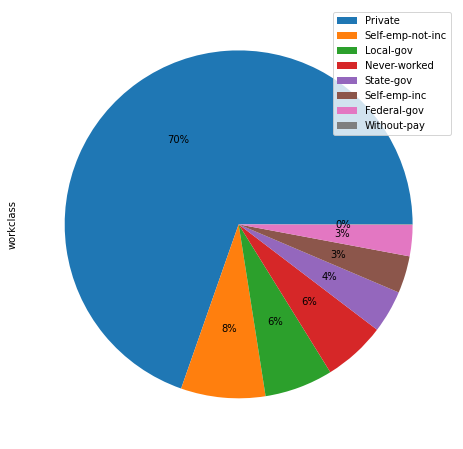

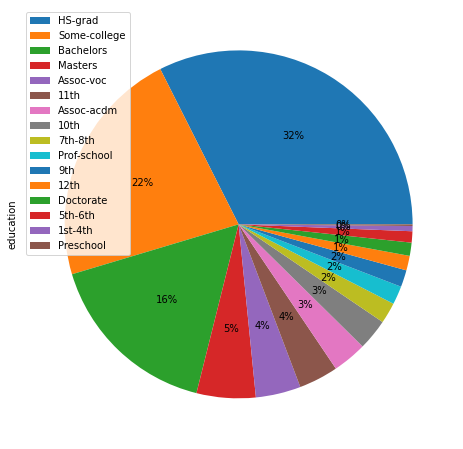

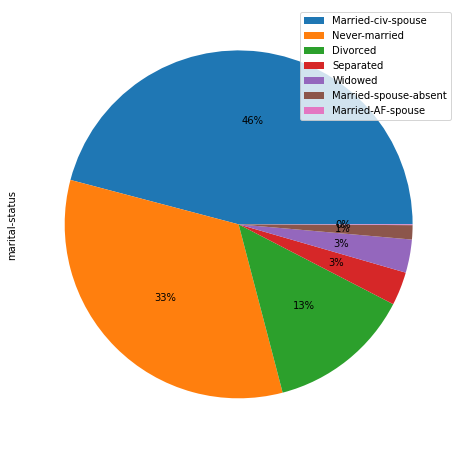

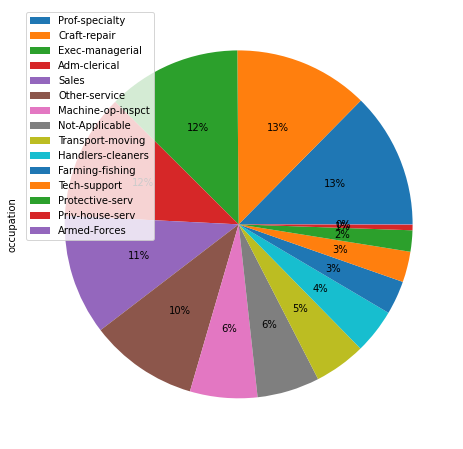

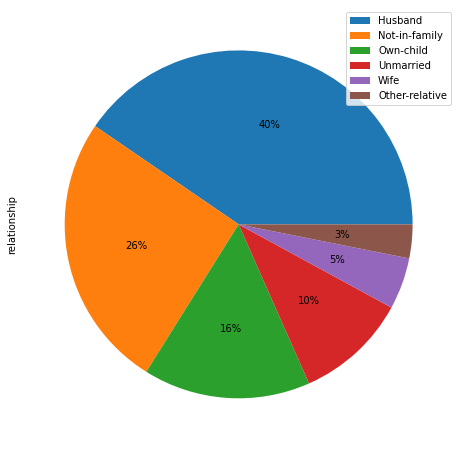

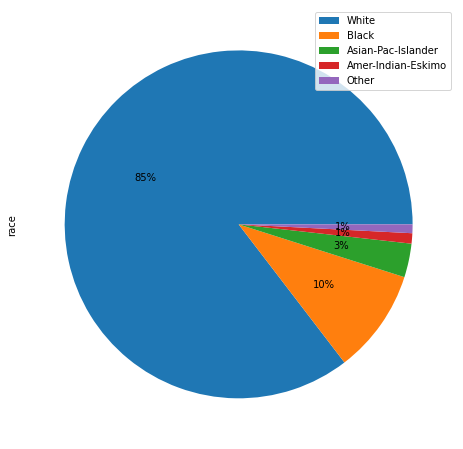

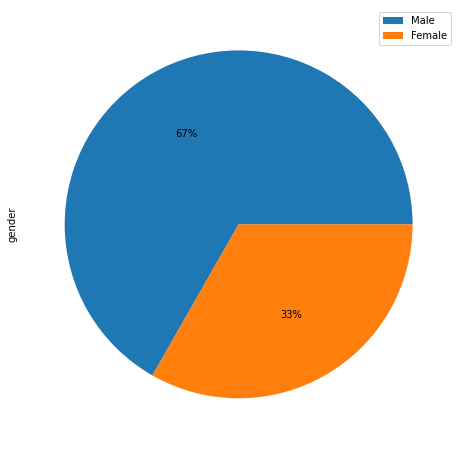

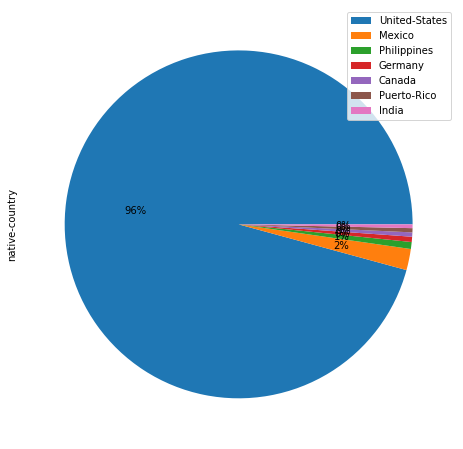

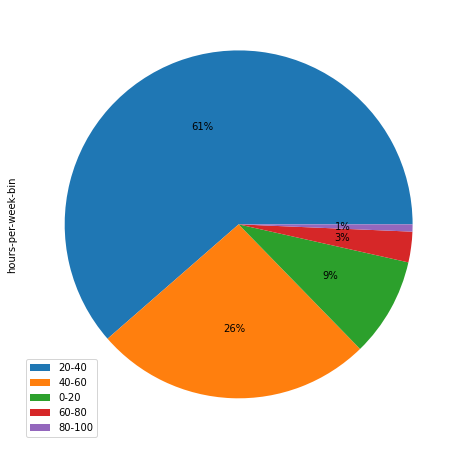

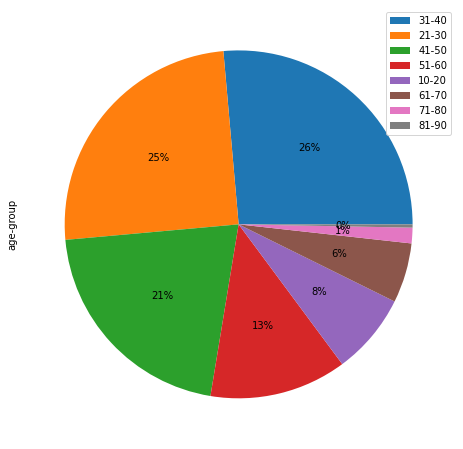

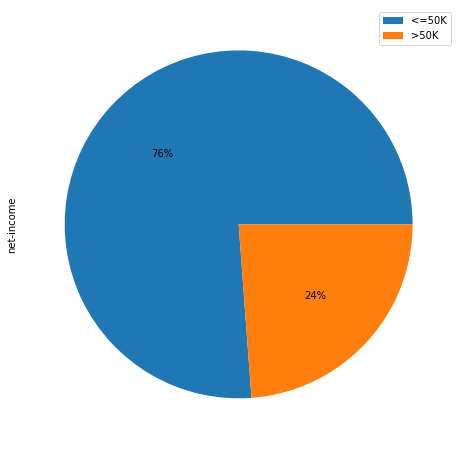

In [51]:
for col in cat_col:
  if col == 'native-country':
    pie_series = df_train[col].value_counts()[:7]
  else:
    pie_series = df_train[col].value_counts()
  pie_series.plot(kind='pie', autopct='%1.0f%%', legend=True, labels=None, figsize=(8,8))
  # plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
  plt.show()

Insights:
* **workclass** : 70% of the population is employed in private jobs
* **education** : A major population has at least studied till high school.
* **marital-status** : 79% of the population is either never married or married civilian
* **occupation** : Occupation is fairly even in distribution.
* **relationship** : 40% of the population is a husband, while only 5% is wife, proving that the data set had more males. 
* **race** : 85% of the data corresponds to white people. All races are not properly represented.
* **gender** : 67% of the data is about male population, indicating a bit of gender bias.
* **native-country** : 96% of the dataset contain US natives, which is expected as this is US Census Income data.
* **hours-per-week-bin** : Most of the population is employed in 20-40 hours/week jobs.
* **age-group** : 84% of the population is between ages 21-60, indicating that dataset targets the working population.
* **net-income** : 76% of the population has a net income <50k USD.
***

#### Bivariate analysis

Now, let's see how these categorical columns relate to 'net-income', our target variable. 
We use count plots to analyse the relationship

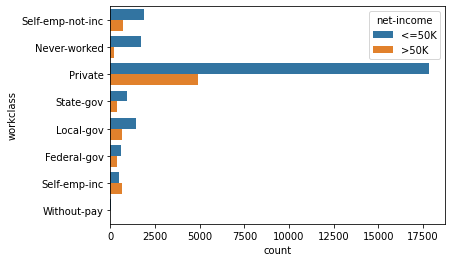

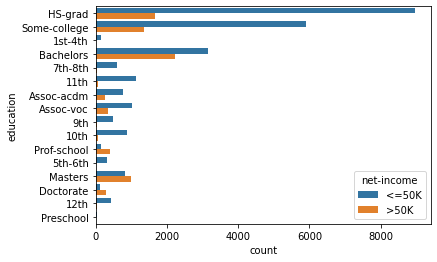

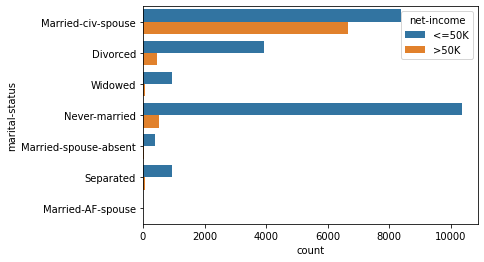

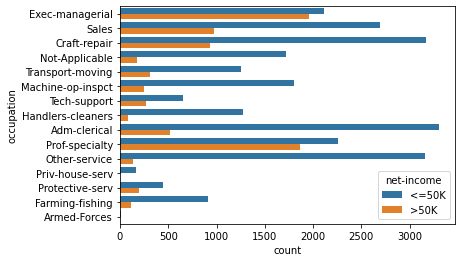

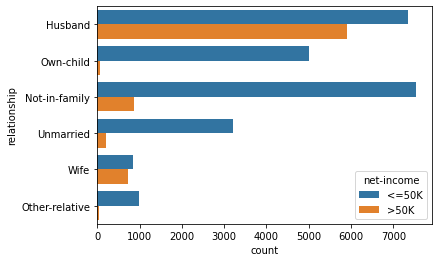

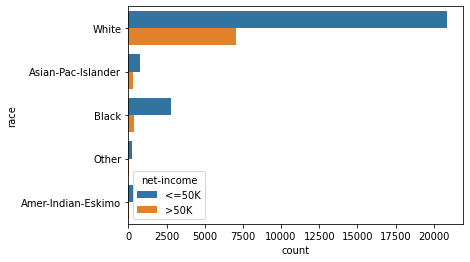

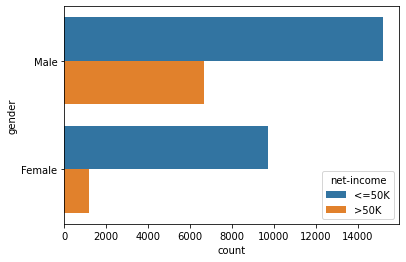

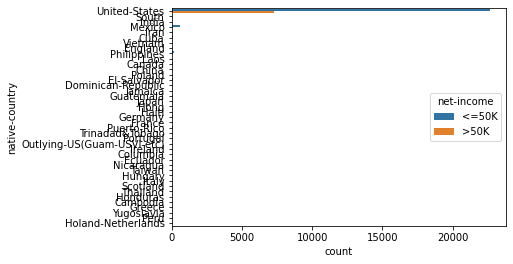

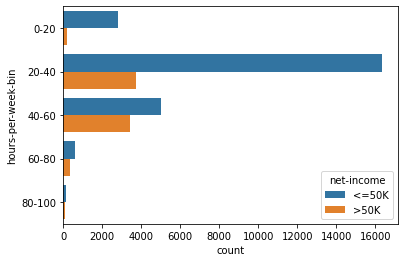

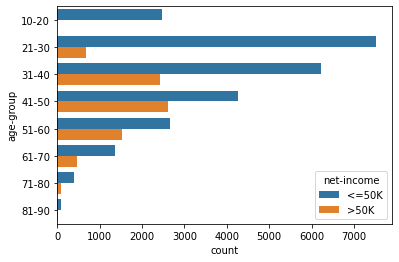

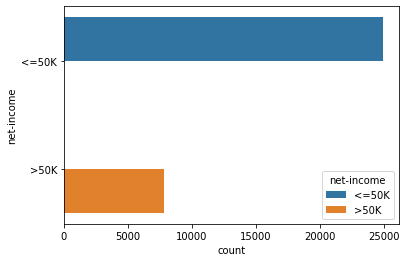

In [59]:
for i in cat_col: 
    ax = sns.countplot(y = i, hue = "net-income", data = df_train)
    plt.show()

Insights:
* **workclass vs net-income** : self-emp-inc, and govt. jobs be it federal, state, gov have higher percentage with income >50K
* **education vs net-income** : If the education is bachelors or higher, the chances are better of earning income >50K
* **marital-status vs net-income** : Married civilian and married armed forces spouse have higher chance of earning income >50K
* **occupation vs net-income** : Exec-managerial and Prof-speciality are the better paid jobs
* **relationship vs net-income** : Married people, both husband and wife have higher proportion of population that have income >50K
* **race vs net-income** : White and Asian-Pac-Islander races have higher chances of earning >50K
* **gender** : Males have higher chances of earning >50K, indicating gender pay gap
* **native-country** : People who natively belong to United States earn more. 
* **hours-per-week-bin** : People belonging to higher range bins earn more. 
* **age-group** : People in the age group 41-60 have higher chances of earning >50K
***

<AxesSubplot:xlabel='education-num', ylabel='count'>

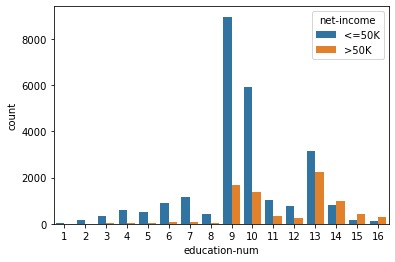

In [ ]:
sns.countplot(x = "education-num", hue = "net-income", data = df_train)

#### Bivariate analysis between numerical features 

We use pairplots and correlation heat map to understand the correlation between all numerical features. 

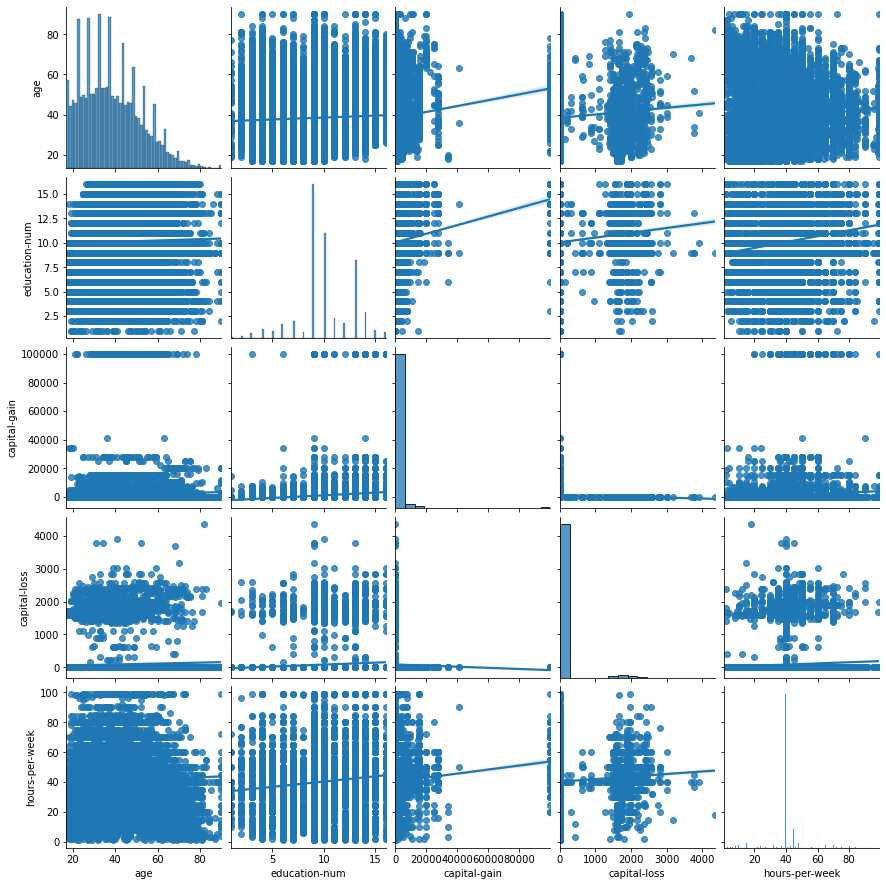

In [ ]:
sns.pairplot(kind = "reg", vars = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week'], data = df_train)

Insights:
* **age** : almost remains constant as education-num increases, increases as capital gain increases, slightly increases as capital loss increases, and is not related with hours per week. 
* **education-num** : increases as age increases, increases as capital gain increases, increases as capital loss increases, increases as hours per week increase.
* **capital-gain** : slightly incrases as age increases, increases as education-num increases, almost remains constant as capital loss increases, increases as hours per week increase.
* **capital-loss** : slightly incrases as age increases, increases as education-num increases, slightly decreases as capital gain increases, and increases as hours per week increase
* **hours-per-week** : increases as age increases, increases as education-num increases, increases as capital gain increases, increases as capital loss increases

In [60]:
a = df_train.corr()

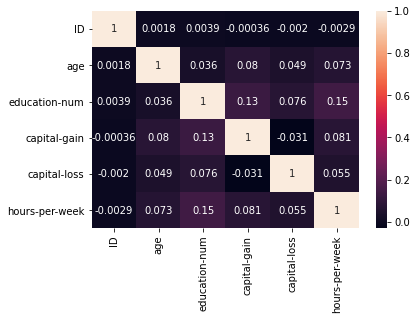

In [61]:
sns.heatmap(a, annot = True)

As we can we, there's no strong correlation between features at all, therefore, we cannot reduce the dimensionality of the dataframe.
***

#### Bivariate analysis between numerical columns and net income

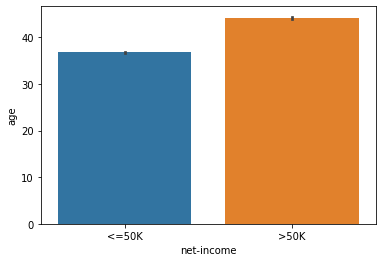

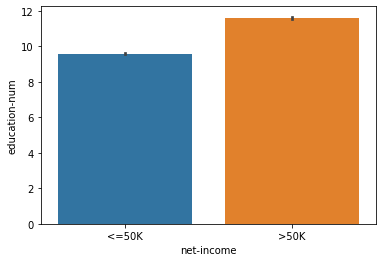

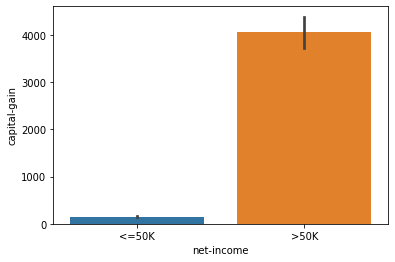

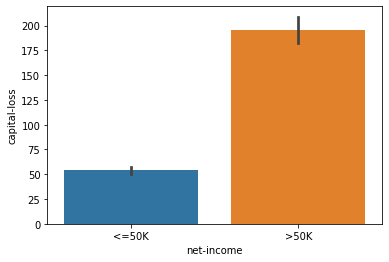

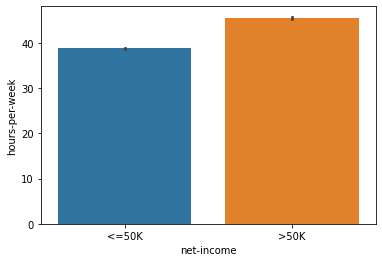

In [65]:
for col in num_col:
  sns.barplot(x='net-income', y=col, data=df_train, estimator=np.mean)
  plt.show()

These bars show the average values of numerical columns. As we can see, people with net income >50K USD have higher average value for all of these numerical columns. 
***

## Building the model

### Label encoding the categorical features

The first step in the model buidling process is to encode the categorical features as numerical features for training. 

In [66]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cat_col.remove('net-income')

for col in cat_col:
    df_train[col] = le.fit_transform(df_train[col])
    df_test[col] = le.transform(df_test[col])
    
df_train['net-income'] = le.fit_transform(df_train['net-income'])

In [67]:
df_train

,ID,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,hours-per-week-bin,age-group,net-income
0,0,60,5,11,9,2,3,0,4,1,0,0,48,38,2,4,0
1,1,28,5,15,10,2,12,3,1,1,0,0,63,34,3,1,0
2,2,71,5,3,2,0,2,1,4,0,0,0,28,38,1,6,0
3,3,75,2,11,9,6,7,1,4,0,0,0,8,38,0,6,0
4,4,50,3,9,13,2,2,0,4,1,0,1887,50,38,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32719,32719,56,3,12,14,4,10,1,4,1,0,0,66,38,3,4,0
32720,32720,36,3,11,9,2,6,0,4,1,0,0,45,38,2,2,0
32721,32721,32,5,6,5,2,2,0,4,1,0,0,32,38,1,2,0
32722,32722,55,3,15,10,0,0,4,4,0,4650,0,20,38,0,4,0


Now, we pick every feature except 'ID' as X in our training data. 

In [68]:
X_train = np.array(df_train.iloc[:,1:-1])
Y_train = np.array(df_train["net-income"])
X_test = np.array(df_test.iloc[:,1:])

In [69]:
X_train

array([[60,  5, 11, ..., 38,  2,  4],
       [28,  5, 15, ..., 34,  3,  1],
       [71,  5,  3, ..., 38,  1,  6],
       ...,
       [32,  5,  6, ..., 38,  1,  2],
       [55,  3, 15, ..., 38,  0,  4],
       [46,  3,  9, ..., 38,  2,  3]])

## K-Fold Cross Validation

Let's define a function to perform K-fold cross validation on the picked models to evaluate the best model for our dataset. This function returns the list of accuracies for model and the average accuracy for the model.

In [70]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def get_kfold_val_accuracy(model):
    kf = KFold(n_splits=5)
    sum_accuracy = 0
    score = []
    for train_index, val_index in kf.split(X_train):
        xtrain = X_train[train_index]
        ytrain = Y_train[train_index]
        xval = X_train[val_index]
        yval = Y_train[val_index]
        model.fit(xtrain, ytrain)
        ypred = model.predict(xval)
        sum_accuracy += accuracy_score(yval, ypred)
        score.append(accuracy_score(yval, ypred))
    return (score, sum_accuracy / 5)

#### Logistic Regression
Avg. Cross Validation Accuracy = 81.01%

In [71]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_list, lr_acc = get_kfold_val_accuracy(lr)
lr_acc

0.8101089317700852

#### KNN Classifier
Avg. Cross Validation Accuracy = 84.87%

In [72]:
from sklearn.neighbors import KNeighborsClassifier
Knc = KNeighborsClassifier(n_neighbors = 10)
Knc_list, Knc_acc = get_kfold_val_accuracy(Knc)
Knc_acc

0.8487959602600764

#### Decision Tree Classifier
Avg. Cross Validation Accuracy = 81.62%

In [73]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc_list, dtc_acc = get_kfold_val_accuracy(dtc)
dtc_acc

0.8162205373369618

#### Random Forest Classifier
Avg. Cross Validation Accuracy = 84.89%

In [74]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc_list, rfc_acc = get_kfold_val_accuracy(rfc)
rfc_acc

0.8489488373700225

#### Naive Bayes Classifier
Avg. Cross Validation Accuracy = 80.94%

In [75]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb_list, nb_acc = get_kfold_val_accuracy(nb)
nb_acc

0.8094059650977528

#### AdaBoost Classifier
Avg. Cross Validation Accuracy = 86.48%

In [76]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=100)
abc_list, abc_acc = get_kfold_val_accuracy(abc)
abc_acc

0.864808640949156

#### SVM Classifier 
Avg. Cross Validation Accuracy = 80.31%

In [77]:
from sklearn.svm import SVC
svc = SVC()
svc_list, svc_acc = get_kfold_val_accuracy(svc)
svc_acc

0.8031109387520289

#### Bagged Decision Tree Model 
Avg. Cross Validation Accuracy = 84.63%

In [78]:
from sklearn.ensemble import BaggingClassifier
bcc = BaggingClassifier(base_estimator=dtc, n_estimators=100, random_state=7)
bcc_list, bcc_acc = get_kfold_val_accuracy(bcc)
bcc_acc

0.8463514254334763

#### Voting Classifier Ensemble of AdaBoost, Random Forest, and KNN models
Avg. Cross Validation Accuracy = 86.31%

In [79]:
from sklearn.ensemble import VotingClassifier
estimators = []
estimators.append(('adaboost', abc))
estimators.append(('randomforest', rfc))
estimators.append(('knn',Knc))
vc = VotingClassifier(estimators)
vc_list, vc_acc = get_kfold_val_accuracy(vc)
vc_acc

0.8631891167224837

The plot below shows the performance of all of the models trained. As we can see, AdaBoost Classifier model performed the best

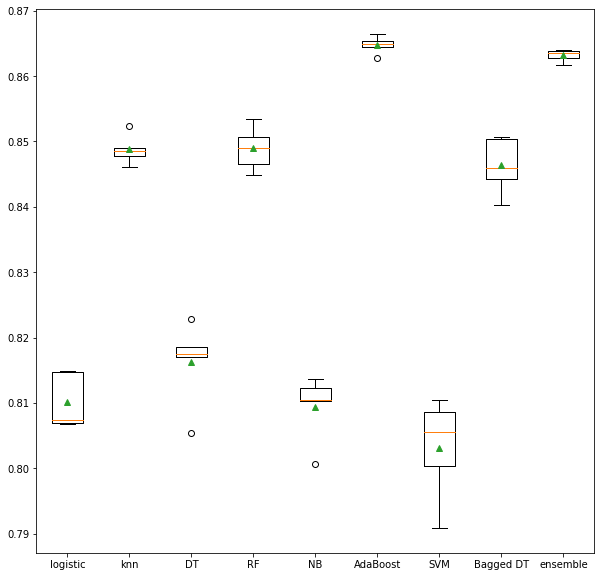

In [83]:
results = [lr_list, Knc_list, dtc_list, rfc_list, nb_list, abc_list, svc_list, bcc_list, vc_list]
labels = ['logistic', 'knn', 'DT', 'RF', 'NB', 'AdaBoost', 'SVM','Bagged DT', 'ensemble']
fig = plt.figure(figsize=(10,10))
fig = plt.boxplot(results, labels=labels, showmeans=True)
plt.show()

***

## Making Predictions

By model analysis, we picked Adaboost classifier and got the predictions for the held out test dataset.

In [84]:
abc.fit(X_train,Y_train)
y_pred = abc.predict(X_test)


abc.score(X_train, Y_train)

0.8652976408751987

We check the feature importance of the features, next. Features like capital-gain, capital-loss, age are the most important features for the model 

In [89]:
col_list = df_train.iloc[:,1:-1].columns.tolist()
feature_imp = abc.feature_importances_
fidf = pd.DataFrame({
    'Feature' : col_list,
    'Importance' : feature_imp
}).sort_values(by='Importance', ascending=False)
fidf

,Feature,Importance
9,capital-gain,0.30
10,capital-loss,0.18
0,age,0.11
5,occupation,0.11
6,relationship,0.08
3,education-num,0.06
2,education,0.04
4,marital-status,0.03
8,gender,0.03
1,workclass,0.02


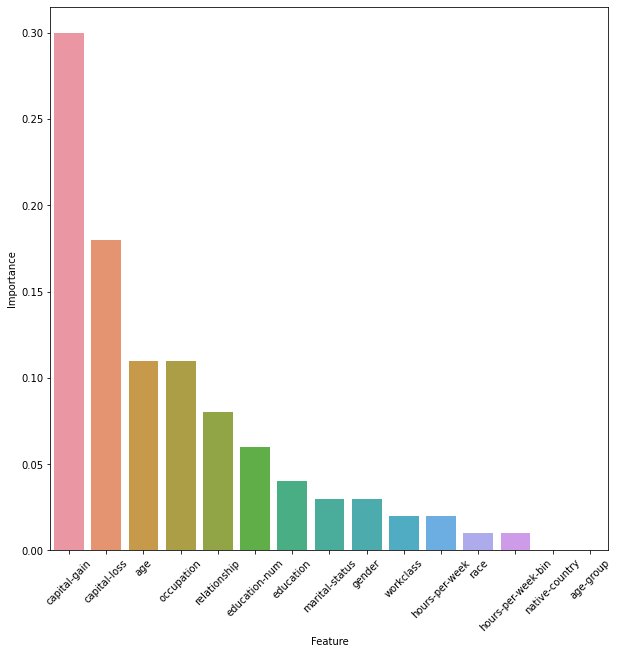

In [98]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(ax=ax, data=fidf, x='Feature', y='Importance')
plt.xticks(rotation=45)
plt.show()

#### Saving the predictions in submission.csv

In [ ]:
y_pred = le.inverse_transform(y_pred)

In [ ]:
y_pred

array(['>50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [ ]:
submission_df = pd.DataFrame({
    "ID" : df_test["ID"],
    "net-income" : y_pred
})
submission_df.to_csv('submission.csv', index=False)

***